# Modelo AdaBoost

#### Importamos las librerias necesarias

In [11]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pickle

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings

In [2]:
X_train_lasso = pd.read_parquet("X_train_lasso.parquet")
y_train = pd.read_parquet("y_train.parquet")
X_test_lasso = pd.read_parquet("X_test_lasso.parquet")
y_test = pd.read_parquet("y_test.parquet")

In [3]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

In [9]:
# Creación del modelo
clf_ada = AdaBoostClassifier(n_estimators=200)

# Entrenamiento del modelo
clf_ada.fit(X_train_lasso, y_train)

C:\ProgramData\Anaconda3\envs\core_models\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=200)

In [4]:
# Cargamos el modelo para no tener que volver a entrenarlo, ejecutar desde aquí.

with open('Adaboost.pickle', 'rb') as f:
    clf_ada = pickle.load(f)

In [6]:
Ada_predictions = clf_ada.predict(X_test_lasso)

In [7]:
print("Classification report:")
print(classification_report(y_test, Ada_predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91   1440322
           1       0.63      0.21      0.32    288210

    accuracy                           0.85   1728532
   macro avg       0.75      0.59      0.62   1728532
weighted avg       0.82      0.85      0.81   1728532



In [8]:
Ada_predict_proba = clf_ada.predict_proba(X_test_lasso)

In [9]:
recall_score(y_test, Ada_predictions)

0.21203289268241907

In [10]:
precision_score(y_test, Ada_predictions)

0.6321048439649555

#### Matriz de confusion

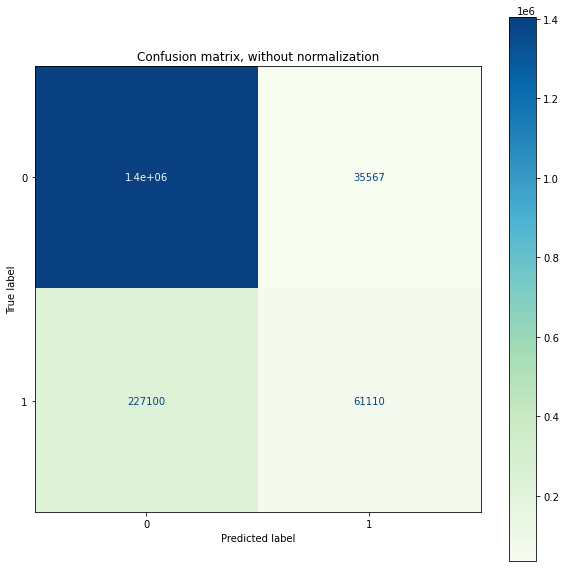

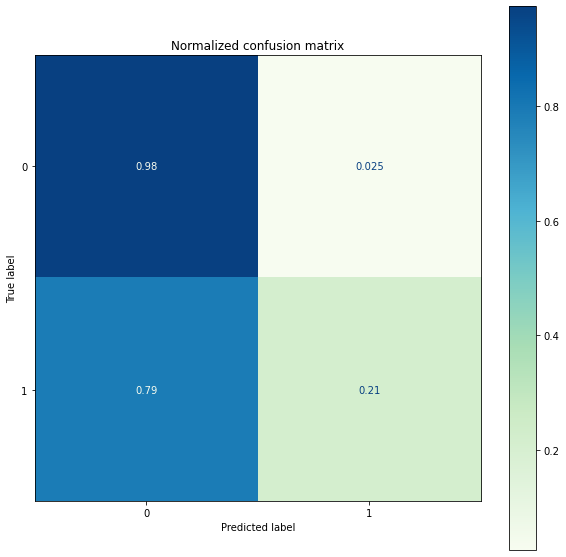

In [15]:
# Matrices de confusiones
titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_test, Ada_predictions,
                                                       cmap=plt.cm.GnBu,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

#### Curvas ROC-AUC

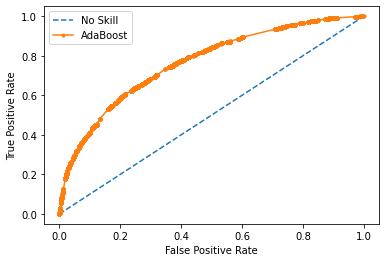

In [16]:
# keep probabilities for the positive outcome only
yhat = Ada_predict_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='AdaBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [17]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [18]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.497844, G-Mean=0.692


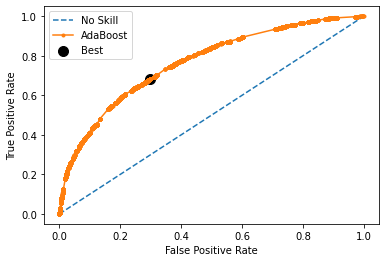

In [19]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='AdaBoost')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [20]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

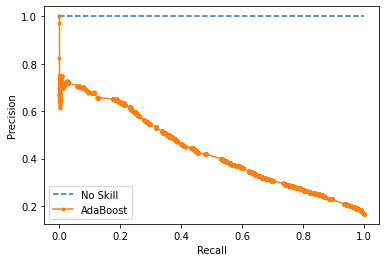

In [21]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='AdaBoost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.498634, F-Score=0.456


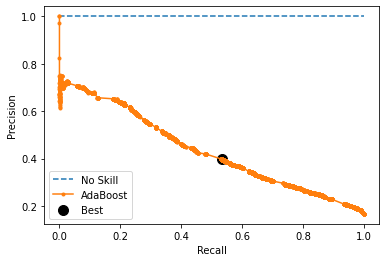

In [22]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='AdaBoost')
plt.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [23]:
# evaluate the model
score = f1_score(y_test, Ada_predictions)
print('F-Score: %.5f' % score)

F-Score: 0.31755


In [24]:
evaluate_model(y_test, Ada_predictions, Ada_predict_proba)

ROC-AUC score of the model: 0.7662841189555369
Accuracy of the model: 0.8480404181120165

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.91   1440322
           1       0.63      0.21      0.32    288210

    accuracy                           0.85   1728532
   macro avg       0.75      0.59      0.62   1728532
weighted avg       0.82      0.85      0.81   1728532


Confusion matrix: 
[[1404755   35567]
 [ 227100   61110]]



### Guardamos el modelo

In [25]:
with open('Adaboost.pickle', 'wb') as f:
    pickle.dump(clf_ada, f)